In [3]:
import numpy as np
import argparse
import imutils
import time
import cv2

from IPython.display import YouTubeVideo
import cv2
import numpy as np
import os
import math
from matplotlib import pyplot as plt
from IPython.display import clear_output
cv2.startWindowThread()
cv2.__version__

'3.4.0'

In [4]:
def plt_show(image, title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
    plt.imshow(image, cmap="Greys_r")
    plt.show()
    

class FaceDetector(object):
    def __init__(self, prototxt,caffeemodel):
        self.net = cv2.dnn.readNetFromCaffe(prototxt, caffeemodel)
    
    def detect(self, image):
        (h, w) = frame.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
            (300, 300), (104.0, 177.0, 123.0))

        # pass the blob through the network and obtain the detections and
        # predictions
        self.net.setInput(blob)
        detections = self.net.forward()

#         # loop over the detections
#         box = detections[0, 0, 0, 3:7] * np.array([w, h, w, h])
#         box.astype("int")
        return detections
    
class VideoCamera(object):
    def __init__(self, index=0):
        self.video = cv2.VideoCapture(index)
        self.index = index
        print (self.video.isOpened())

    def __del__(self):
        self.video.release()
    
    def get_frame(self, in_grayscale=False):
        _, frame = self.video.read()
        if in_grayscale:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        return frame
    
def cut_faces(image, faces_coord):
    (x, y, w, h) = faces_coord
    return image[y:h, x : x + (w-x)]

def draw_rectangle(image, coords):
    (x, y, j, k) = coords
    cv2.rectangle(image, (x, y), (j, k),(0, 0, 255), 2)
    
def collect_dataset():
    images = []
    labels = []
    labels_dic = {}
    people = [person for person in os.listdir("people/")]
    for i, person in enumerate(people):
        labels_dic[i] = person
        for image in os.listdir("people/" + person):
            images.append(cv2.imread("people/" + person + '/' + image, 
                                     0))
            labels.append(i)
    return (images, np.array(labels), labels_dic)

In [9]:
# deep learning model for facial detection
detector = FaceDetector('./model_parameters/deploy.prototxt.txt','./model_parameters/res10_300x300_ssd_iter_140000.caffemodel')

# turns on camera
webcam = VideoCamera()

True


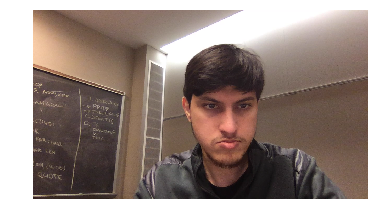

In [6]:
# Takes pictures
frame = webcam.get_frame()
plt_show(frame)

In [13]:
del webcam

# Facial Detection

Live Video Interrupted


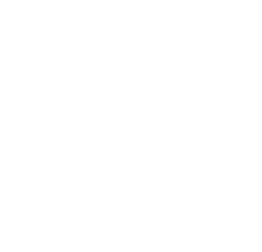

In [10]:
#draws the box around face.
try:
    while True:
        # grab the frame from the threaded video stream and resize it
        # to have a maximum width of 400 pixels
        frame = webcam.get_frame()
        h, w = frame.shape[0],frame.shape[1]
        # detects face in frame and returns a list of coordinates with confidence
        detections=detector.detect(frame)

        for i in range(0, detections.shape[2]):
            # extract the confidence (i.e., probability) associated with the prediction
            confidence = detections[0, 0, 0, 2]

            # filter out weak detections by ensuring the `confidence` is
            # greater than the minimum confidence
            if confidence < 0.5:
                continue
        
            # loop over the detections
            box = detections[0, 0, 0, 3:7] * np.array([w, h, w, h])
            
            # draw the bounding box of the face 
            draw_rectangle(frame,box.astype("int"))
        
        # show the output frame
#         cv2.imshow("Frame", frame)
        plt_show(frame)
        key = cv2.waitKey(1) & 0xFF
        clear_output(wait = True)
except KeyboardInterrupt:
     print ("Live Video Interrupted")

In [11]:
#draws the box around face.
try:
    while True:
        # grab the frame from the threaded video stream and resize it
        # to have a maximum width of 400 pixels
        frame = webcam.get_frame()
        h, w = frame.shape[0],frame.shape[1]
        # detects face in frame and returns a list of coordinates with confidence
        detections=detector.detect(frame)

        # extract the confidence (i.e., probability) associated with the prediction
        confidence = detections[0, 0, 0, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if detections[0, 0, 0, 2] > 0.5:
            # loop over the detections
            box = detections[0, 0, 0, 3:7] * np.array([w, h, w, h])

            # draw the bounding box of the face 
            draw_rectangle(frame,box.astype("int"))
            
        # show the output frame
#         cv2.imshow("Frame", frame)
        plt_show(frame)
        key = cv2.waitKey(1) & 0xFF
        clear_output(wait = True)
except KeyboardInterrupt:
     print ("Live Video Interrupted")

Live Video Interrupted


<Figure size 432x288 with 0 Axes>

# Only Face

In [12]:
# cut face for one person only!
try:
    while True:
        # grab the frame from the threaded video stream
        frame = webcam.get_frame()
        h, w = frame.shape[0],frame.shape[1]
        # detects face in frame and returns a list of coordinates with confidence
        detections=detector.detect(frame)

        # gets the first best confidence
        box = detections[0, 0, 0, 3:7] * np.array([w, h, w, h])
        
        # show the output frame
#         cv2.imshow("Frame", frame)
        plt_show(cut_faces(frame,box.astype("int")))
        key = cv2.waitKey(1) & 0xFF
        clear_output(wait = True)
except KeyboardInterrupt:
     print ("Live Video Interrupted")

Live Video Interrupted


# Creates training set

In [ ]:
# making training set
# if not os.path.exists('people'):
#     os.mkdir('people')
folder = ("people/" + input('Person: ').lower()) # input name
# cv2.namedWindow("PyData Tutorial", cv2.WINDOW_AUTOSIZE)
if not os.path.exists(folder):
    os.mkdir(folder)
    counter = 1
    timer = 0
    while counter < 21 : # take 20 pictures
        frame = webcam.get_frame()
        h, w = frame.shape[0],frame.shape[1]
        detections = detector.detect(frame) # detect
        box = (detections[0, 0, 0, 3:7] * np.array([w, h, w, h])).astype('int')
        if len(box) and timer % 700 == 50: # every Second or so
            cv2.imwrite(folder + '/' + str(counter) + '.jpg', cut_faces(frame,box))
            plt_show(cut_faces(frame,box), "Images Saved:" + str(counter))
            clear_output(wait = True) # saved face in notebook
            counter += 1
#             draw_rectangle(frame, faces_coord) # rectangle around face
#         cv2.imshow("PyData Tutorial", frame) # live feed in external
        cv2.waitKey(50)
        timer += 50
    cv2.destroyAllWindows()
else:
    print ("This name already exists.")

In [ ]:
# # original code
# try:
#     while True:
#         # grab the frame from the threaded video stream and resize it
#         # to have a maximum width of 400 pixels
#         frame = webcam.get_frame()

#         # grab the frame dimensions and convert it to a blob
#         (h, w) = frame.shape[:2]
#         blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
#             (300, 300), (104.0, 177.0, 123.0))

#         # pass the blob through the network and obtain the detections and
#         # predictions
#         net.setInput(blob)
#         detections = net.forward()

#         # loop over the detections
#         for i in range(0, detections.shape[2]):
#             # extract the confidence (i.e., probability) associated with the
#             # prediction
#             confidence = detections[0, 0, i, 2]

#             # filter out weak detections by ensuring the `confidence` is
#             # greater than the minimum confidence
#             if confidence < 0.5:
#                 continue

#             # compute the (x, y)-coordinates of the bounding box for the
#             # object
#             box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
#             (startX, startY, endX, endY) = box.astype("int")

#             # draw the bounding box of the face along with the associated
#             # probability
# #             text = "{:.2f}%".format(confidence * 100)
# #             y = startY - 10 if startY - 10 > 10 else startY + 10
#             cv2.rectangle(frame, (startX, startY), (endX, endY),
#                 (0, 0, 255), 2)
# #             cv2.putText(frame, text, (startX, y),
# #                 cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

#         # show the output frame
# #         cv2.imshow("Frame", frame)
#         plt_show(frame)
#         key = cv2.waitKey(1) & 0xFF

#         # if the `q` key was pressed, break from the loop
# #         if key == ord("q"):
# #             break
#         clear_output(wait = True)
# except KeyboardInterrupt:
#      print ("Live Video Interrupted")